In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pulp
#for davis dataset 
#rabi=pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\Rabi_fertilizer_data_merged_dacnet_2009_2017_farmer_cost_davis_waer.csv")#davis data 
#for davis 
#kharif=pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\kharif_fertilizer_data_merged_dacnet_2009_2017_farmer_cost_davis_waer.csv")

#adding water in using hoestra data 
kharif=pd.read_csv(r"E:\crop_switchning\fig2\code_final\kharif_waterdemand.csv")
rabi=pd.read_csv(r"E:\crop_switchning\fig2\code_final\rabi_waterdemand.csv")
CoP= pd.read_csv(r"E:\crop_switchning\cost_of_production.csv")
bnf_applied= pd.read_csv(r"E:\crop_switchning\bnf\bnf_app.csv")
# Convert 'State' and 'Crop' column values to lowercase
CoP['State'] = CoP['State'].str.strip().str.lower()
CoP['Crop'] = CoP['Crop'].str.strip().str.lower()

# Now, the 'State' and 'Crop' columns in CoP DataFrame have all their values in lowercase
# Rename the columns in CoP to match kharif DataFrame for a consistent merge
CoP_renamed = CoP.rename(columns={"Crop": "crop", "State": "state", "CostofProduction_rs_Quintal": "Cost_of_Production_rs_Quintal"})

# Perform the merge
rabi = pd.merge(rabi, CoP_renamed, how='left', on=['state', 'Year', 'crop'])


In [13]:
import pandas as pd

# Sample data to illustrate the process. The actual data is not shown due to the format of the question.
# These dictionaries represent the mapping from atm['State'] to kharif['state'] based on the provided examples.
state_name_mapping = {
    'Andaman and Nicobar': 'andaman and nicobar',
    'Andhra Pradesh': 'andhra pradesh',
    'Arunachal Pradesh': 'arunachal pradesh',
    'Assam': 'assam',
    'Bihar': 'bihar',
    'Chandigarh': 'chandigarh',
    'Chhattisgarh': 'chhattisgarh',
    'Dadra and Nagar Haveli': 'dadra and nagar haveli',
    'Daman and Diu': 'the dadra and nagar haveli and daman and diu', # Assuming both to be mapped to the single entry in kharif
    'Delhi': 'delhi', # Not present in the provided kharif states list, but added for completeness
    'Goa': 'goa', # Not present in the provided list, but added for completeness
    'Gujarat': 'gujarat',
    'Haryana': 'haryana',
    'Himachal Pradesh': 'himachal pradesh',
    'Jammu and Kashmir': 'jammu and kashmir',
    'Jharkhand': 'jharkhand',
    'Karnataka': 'karnataka',
    'Kerala': 'kerala',
    'Lakshadweep': 'lakshadweep', # Not present, but added for completeness
    'Madhya Pradesh': 'madhya pradesh',
    'Maharashtra': 'maharashtra',
    'Manipur': 'manipur',
    'Meghalaya': 'meghalaya',
    'Mizoram': 'mizoram',
    'Nagaland': 'nagaland',
    'Orissa': 'odisha',
    'Puducherry': 'puducherry',
    'Punjab': 'punjab',
    'Rajasthan': 'rajasthan',
    'Sikkim': 'sikkim',
    'Tamil Nadu': 'tamil nadu',
    'Telangana': 'telangana',
    'Tripura': 'tripura',
    'Uttar Pradesh': 'uttar pradesh',
    'Uttaranchal': 'uttarakhand', # Mapped to 'uttarakhand' as per provided list
    'West Bengal': 'west bengal',
}

# Assume atm_df and kharif_df are the DataFrames for the 'atm' and 'kharif' datasets, respectively.
# This code will update the 'State' column in atm_df to match the 'state' values in kharif_df.

# Example atm_df DataFrame creation
# This is a placeholder and should be replaced with the actual atm DataFrame in practice.
atm_df= pd.read_csv(r"E:\crop_switchning\fig2\code_final\atmospheric_depo_isimip_2a.csv")   # kg/ha

# Update 'State' in atm_df to match 'state' in kharif_df using the mapping
atm_df['State'] = atm_df['State'].map(state_name_mapping)
# Renaming 'State' in atm_df to 'state' to match kharif_df column name for a consistent merge
atm_df.rename(columns={'State': 'state'}, inplace=True)
# Assuming kharif_df exists, the merge operation would look like this:
# merged_df = pd.merge(kharif_df, atm_df, left_on='state', right_on='State')

# Displaying the updated atm_df for verification
atm_df


,Year,state,atm_depo
0,2009,andaman and nicobar,0.000000
1,2010,andaman and nicobar,0.000000
2,2011,andaman and nicobar,0.000000
3,2012,andaman and nicobar,0.000000
4,2013,andaman and nicobar,0.000000
...,...,...,...
427,2020,telangana,1.447027
428,2020,tripura,1.309994
429,2020,uttar pradesh,1.855148
430,2020,uttarakhand,1.651030


In [14]:
# Performing the merge based on 'state' and 'Year'
rabi = pd.merge(rabi, atm_df, on=['state', 'Year'], how='left')
rabi = pd.merge(rabi, bnf_applied, on=[ 'Year'], how='left')
#coeff from image mmodel 
import pandas as pd 
image_coeff= pd.read_csv(r"E:\network restructurong\trial_analysis\image_coeff.csv")
image_coeff.rename(columns={'fN2O[% of Nsurplus]': 'fn2o', 'fNO3_leaching_to_GW[% of Nsurplus]': 'fno3'}, inplace=True)
image_coeff['State'] = image_coeff['State'].str.lower().str.strip()
image_coeff.rename(columns={'fN2O[% of Nsurplus]': 'fn2o', 'fNO3_leaching_to_GW[% of Nsurplus]': 'fno3'}, inplace=True)
image_coeff['fn2o'] = image_coeff['fn2o'] / 100    # as the value provided is in percentage 
image_coeff['fno3'] = image_coeff['fno3'] / 100

#image_coeff.rename(columns={'State':'state'}, inplace=True)
# Create a mapping dictionary from the abbreviated state names to the full state names
state_mapping = {
     'the dadra and nagar haveli and daman and diu':'dadra and nagar haveli',
    'andaman and nicobar islands':'andaman and nicobar'
}

# Use the 'replace' method to update the 'State' column in cwc_crop
image_coeff['State'] = image_coeff['State'].replace(state_mapping)
image_coeff.rename(columns={'State': 'state'}, inplace=True)
rabi = pd.merge(rabi, image_coeff, on=[ 'state'], how='left')

del kharif['Unnamed: 0']
del rabi['Unnamed: 0']
#manure nitrogen and P 
kharif['Manure (N_kg/ha)']=kharif['Manure (kg/ha)']*.005   #  https://agritech.tnau.ac.in/org_farm/orgfarm_manure.html
kharif['Manure (P_kg/ha)']=kharif['Manure (kg/ha)']*.002

rabi['Manure (N_kg/ha)']=rabi['Manure (kg/ha)']*.005
rabi['Manure (P_kg/ha)']=rabi['Manure (kg/ha)']*.002
#decadal scale maximum area  in of a rabi crop in a district 
rabi_max=pd.read_csv(r"E:\network restructurong\data_set_new\crop\rabi_max.csv")


# Ensure columns are numeric
rabi['N_applied(kg/ha)'] = pd.to_numeric(rabi['N_applied(kg/ha)'], errors='coerce')
rabi['Manure (N_kg/ha)'] = pd.to_numeric(rabi['Manure (N_kg/ha)'], errors='coerce')
rabi['P_applied(kg/ha)'] = pd.to_numeric(rabi['P_applied(kg/ha)'], errors='coerce')
rabi['Manure (P_kg/ha)'] = pd.to_numeric(rabi['Manure (P_kg/ha)'], errors='coerce')
rabi['Manure (N_kg/ha)'] = pd.to_numeric(rabi['Manure (N_kg/ha)'], errors='coerce')
rabi['CWR m3/ha'] = pd.to_numeric(rabi['CWR m3/ha'], errors='coerce')
rabi['CWU green m3/ha'] = pd.to_numeric(rabi['CWU green m3/ha'], errors='coerce')
rabi['CWU blue m3/ha'] = pd.to_numeric(rabi['CWU blue m3/ha'], errors='coerce')
# Replace 0 with np.nan using np.where
rabi['N_applied(kg/ha)'] = np.where(rabi['N_applied(kg/ha)'] == 0, np.nan, rabi['N_applied(kg/ha)'])
rabi['Manure (N_kg/ha)'] = np.where(rabi['Manure (N_kg/ha)'] == 0, np.nan, rabi['Manure (N_kg/ha)'])
rabi['P_applied(kg/ha)'] = np.where(rabi['P_applied(kg/ha)'] == 0, np.nan, rabi['P_applied(kg/ha)'])
rabi['Manure (P_kg/ha)'] = np.where(rabi['Manure (P_kg/ha)'] == 0, np.nan, rabi['Manure (P_kg/ha)'])
rabi['CWR m3/ha']  = np.where(rabi['CWR m3/ha'] == 0, np.nan, rabi['CWR m3/ha'])
rabi['CWU green m3/ha'] = np.where(rabi['CWU green m3/ha'] == 0, np.nan, rabi['CWU green m3/ha'])
rabi['CWU blue m3/ha'] = np.where(rabi['CWU blue m3/ha'] == 0, np.nan, rabi['CWU blue m3/ha'])

#calculating n app rate 
#calculating n app rate 
#kharif['net_N_applied(kg/ha)']=kharif['N_applied(kg/ha)']+kharif['Manure (N_kg/ha)'] + kharif['atm_depo'] +kharif['BNF_kg_per_hec'] 

#kharif['net_P_applied(kg/ha)']=kharif['P_applied(kg/ha)']+kharif['Manure (P_kg/ha)'] 

#calculating n app rate 
rabi['net_N_applied(kg/ha)']=rabi['N_applied(kg/ha)']+rabi['Manure (N_kg/ha)'] + rabi['atm_depo'] +rabi['BNF_kg_per_hec'] 
rabi['net_P_applied(kg/ha)']=rabi['P_applied(kg/ha)']+rabi['Manure (P_kg/ha)']


In [15]:
# Selecting the columns needed for the calculation
columns_of_interest = [
    'state', 'district', 'crop', 'N_applied(kg/ha)', 'P_applied(kg/ha)', 
    'K_applied(kg/ha)', 'Manure (kg/ha)', 'calorie_per_100g', 'MSP_RsperQntl', 
    'CostofCultivation_rs_ha','CWR m3/ha', 'CWR_y', 'CWU green_y', 'CWU blue_y','CWR m3/ha',	'CWU green m3/ha',	'CWU blue m3/ha'
]

# Replacing infinite values with NaNs in these columns
for col in columns_of_interest:
    rabi[col].replace([float('inf'), float('-inf')], pd.NA, inplace=True)

In [16]:
#takeb from https://link.springer.com/article/10.1007/bf03187117    
#Surface N balances and reactive N loss to the environment from global intensive agricultural production systems for the period 1970–2030

# Define the nitrogen content dictionary (as provided previously)  # value in kg per kg product
#crop_nitrogen_content = {
#    'rice': .013,
#   'wheat': .019,
#    'jowar': .015,
#    'bajra': .015,
#    'maize': .014,
#    'ragi': .015,
#    'barley': .017
#}
#https://www.fao.org/faostat/en/#data/ESB
crop_nitrogen_content = {
    'rice': .0129,
    'jowar': .0146,   # SORGHUM
    'bajra': .0204,
    'maize': .0124,
    'ragi': .0204
    ,'wheat':.0209
    #,'barley':.018
}
# Create the n_removed column by multiplying PRODUCTION (kg) by nitrogen content
rabi['n_removed_rate'] = rabi.apply(lambda row:crop_nitrogen_content.get(row['crop'], 0), axis=1)

crop_phosphorous_content = {
    'rice': .0028,
    'jowar': .0045,   # SORGHUM
    'bajra': .0042,
    'maize': .0034,
    'ragi': .0042
    ,'wheat':.0042
   # ,'barley':.0032
    
}
# Create the n_removed column by multiplying PRODUCTION (kg) by nitrogen content
rabi['n_removed_rate'] = rabi.apply(lambda row:crop_nitrogen_content.get(row['crop'], 0), axis=1)

# Create the p_removed column by multiplying PRODUCTION (kg) by nitrogen content
rabi['p_removed_rate'] = rabi.apply(lambda row:crop_phosphorous_content.get(row['crop'], 0), axis=1)



In [17]:
#getting year specific data 
rabi_2017 = rabi[rabi['Year'].isin([2017])]

In [18]:
# Calculate the crop-specific average values for each nutrient
avg_nutrients = rabi_2017.groupby('crop')[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']].transform('mean')

# Fill NaN values in kharif with the crop-specific average values
rabi_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']] = rabi_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']].fillna(avg_nutrients)

avg_wat=rabi_2017.groupby(['state','crop'])[['CWR m3/ha', 'CWU green m3/ha','CWU blue m3/ha']].transform('mean')
rabi_2017[['CWR m3/ha', 'CWU green m3/ha','CWU blue m3/ha']] = rabi_2017[['CWR m3/ha', 'CWU green m3/ha','CWU blue m3/ha']].fillna(avg_wat)


C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\1257474672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']] = rabi_2017[['N_applied(kg/ha)', 'P_applied(kg/ha)', 'K_applied(kg/ha)', 'Manure (kg/ha)','Cost_of_Production_rs_Quintal']].fillna(avg_nutrients)
C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\1257474672.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017[['CWR m3/h

In [19]:
# Assuming rabi_2017 is your DataFrame
rabi_2017['Manure (N_kg/ha)'].fillna(0, inplace=True)
rabi_2017['Manure (P_kg/ha)'].fillna(0, inplace=True)
#calculating n app rate 
#calculating n app rate 
rabi_2017['net_N_applied(kg/ha)']=rabi_2017['N_applied(kg/ha)']+rabi_2017['Manure (N_kg/ha)'] + rabi_2017['atm_depo'] +rabi_2017['BNF_kg_per_hec'] 
rabi_2017['net_P_applied(kg/ha)']=rabi_2017['P_applied(kg/ha)']+rabi_2017['Manure (P_kg/ha)']

#finding historical area 
# Grouping the data by state, district, and crop and summing the area
historical_cereal_area = rabi.groupby(['state', 'district', 'crop'])['Area (Hectare)'].mean()

# Convert the grouped data to a dictionary
historical_cereal_area_dict = historical_cereal_area.to_dict()

#historiccally maximum area 
# Grouping the data by state and district and summing the area to find the maximum historical area
total_historical_area_district = rabi.groupby(['state', 'district','Year'])['Area (Hectare)'].sum()
max_historical_area_district = rabi.groupby(['state', 'district'])['Area (Hectare)'].mean()

# Convert the grouped data to a dictionary
max_historical_area_district_dict = max_historical_area_district.to_dict()

# Display the first few elements of the dictionary to verify
list(max_historical_area_district_dict.items())[:5]



C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\399220769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017['Manure (N_kg/ha)'].fillna(0, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\399220769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rabi_2017['Manure (P_kg/ha)'].fillna(0, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\399220769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

[(('andaman and nicobar', 'nicobars'), 3.728),
 (('andaman and nicobar', 'north and middle andaman'), 59.58200000000001),
 (('andaman and nicobar', 'south andamans'), 44.492000000000004),
 (('andhra pradesh', 'adilabad'), 9256.736842105263),
 (('andhra pradesh', 'anantapur'), 4664.706896551724)]

C:\Users\shekh\anaconda3\envs\geo_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


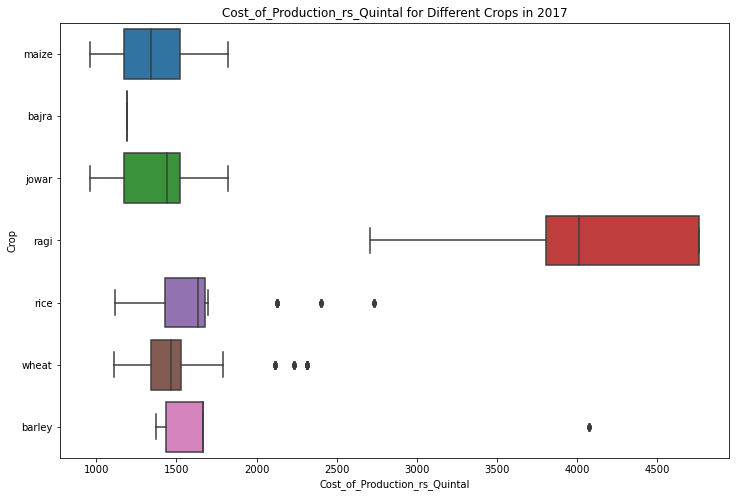

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out rows where 'Fert_N' is NaN
data_2017_filtered = rabi_2017.dropna(subset=['Cost_of_Production_rs_Quintal'])

# Plotting 'Fert_N' for different crops
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cost_of_Production_rs_Quintal', y='crop', data=data_2017_filtered)
plt.title('Cost_of_Production_rs_Quintal for Different Crops in 2017')
plt.xlabel('Cost_of_Production_rs_Quintal')
plt.ylabel('Crop')
plt.show()

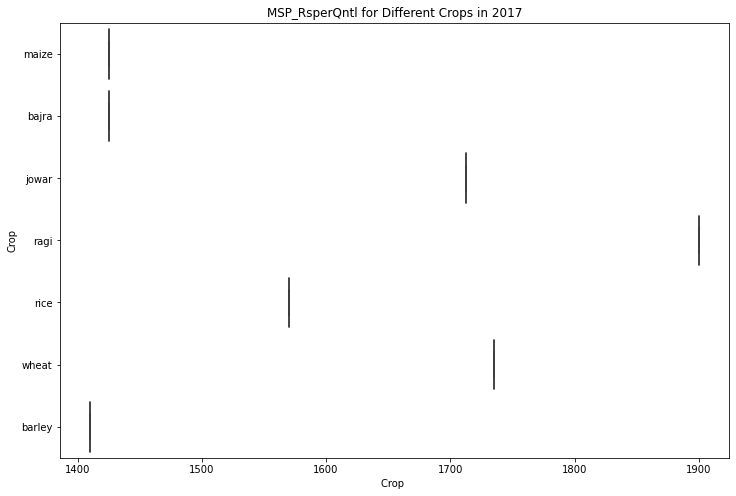

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out rows where 'Fert_N' is NaN
data_2017_filtered = rabi_2017.dropna(subset=['MSP_RsperQntl'])

# Plotting 'Fert_N' for different crops
plt.figure(figsize=(12, 8))
sns.boxplot(x='MSP_RsperQntl', y='crop', data=data_2017_filtered)
plt.title('MSP_RsperQntl for Different Crops in 2017')
plt.xlabel('Crop ')
plt.ylabel('Crop')
plt.show()


C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\1108462904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'district': 'District'}, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\1108462904.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'state': 'State'}, inplace=True)
C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\1108462904.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

All NaN values filled


C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\1108462904.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YIELD (Kg per ha)'] = 1000*df['Yield (Tonnes/Hectare)'].replace(-1, 0)
C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\1108462904.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Calorie Supply (per KG)'] = df['Crop'].map(calorie_per_kg)   # crop wise calorie mapping
C:\Users\shekh\AppData\Local\Temp\ipykernel_3924\1108462904.py:115: SettingWithCopyWarning: 
A value is trying to be 

Original Total Nitrogen Applied kg: 1224471874.4666696
Original Total Nitrogen Surplus generated kg: 821739252.2746699
Original Total phosphorus Applied kg: 506654575.12975407
Original Total phosphorus Surplus generated kg: 407902984.17775357
Original Total water Applied: 47281040468.482254


C:\Users\shekh\anaconda3\envs\geo_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


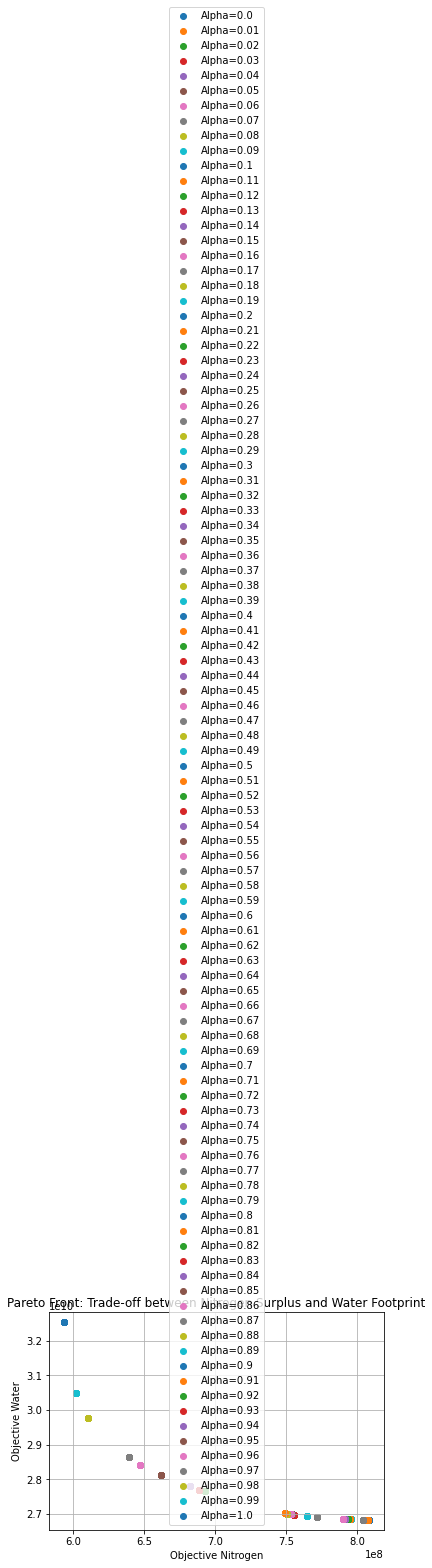

In [35]:
#plotting only alpha 

# using hoestra 

#minimizing total water demand in kharif period 
df = rabi_2017
#del df['Unnamed: 0']
# Renaming the column
df.rename(columns={'district': 'District'}, inplace=True)
df.rename(columns={'state': 'State'}, inplace=True)
df.rename(columns={'crop': 'Crop'}, inplace=True)



#maximum area 
rabi_max.rename(columns={'district': 'District'}, inplace=True)
rabi_max.rename(columns={'state': 'State'}, inplace=True)
rabi_max.rename(columns={'crop': 'Crop'}, inplace=True)
rabi_max['Crop'] = rabi_max['Crop'].str.lower().str.strip()
# Step 2: Create a dictionary for maximum area constraints
max_area_constraints = rabi_max.set_index(['State','District', 'Crop'])['Area (Hectare)'].to_dict()



#calculating n app rate 
#df['net_N_applied(kg/ha)']=df['N_applied(kg/ha)']
 #  only kharif crop 
# Step 1: Filter the DataFrame
selected_crops = ['bajra', 'jowar', 'maize', 'ragi', 'rice','wheat']
df = df[df['Crop'].isin(selected_crops)]

# Convert to lowercase and strip whitespace
df['District'] = df['District'].str.lower().str.strip()
df['State'] = df['State'].str.lower().str.strip()
df['Crop'] = df['Crop'].str.lower().str.strip()

#fillin nan value in applied n with national avg 
#filling the nan values in the n application rate with state and crop avg value 
# Compute the average for 'N_applied(kg/ha)' grouped by 'State' and 'Crop'
avg_N_applied = df.groupby(['Crop'])['net_N_applied(kg/ha)'].transform('mean')
global_avg=rabi.groupby(['crop'])['net_N_applied(kg/ha)'].transform('mean')
# Replace NaN values in 'net_N_applied(kg/ha)' with the computed average
df['net_N_applied(kg/ha)'].fillna(avg_N_applied, inplace=True)
if df['net_N_applied(kg/ha)'].isnull().any():
    df['net_N_applied(kg/ha)'].fillna(global_avg, inplace=True)  # Fallback to global average if needed


avg_P_applied = df.groupby(['Crop'])['net_P_applied(kg/ha)'].transform('mean')
global_avg_P=rabi.groupby(['crop'])['net_P_applied(kg/ha)'].transform('mean')
# Replace NaN values in 'net_P_applied(kg/ha)' with the computed average
df['net_P_applied(kg/ha)'].fillna(avg_P_applied, inplace=True)
if df['net_P_applied(kg/ha)'].isnull().any():
    df['net_P_applied(kg/ha)'].fillna(global_avg_P, inplace=True)  # Fallback to global average if needed
#filling cost of cultivattion with avg vallue 
# Step 1
avg_cost_cult = df.groupby('Crop')['CostofCultivation_rs_ha'].transform('mean')

# Step 2
df['CostofCultivation_rs_ha'].fillna(avg_cost_cult, inplace=True)

# Step 3
if df['CostofCultivation_rs_ha'].isnull().any():
    print("NaN values present after local crop average fill")

    # Step 4
    global_avg_cost_cult = rabi.groupby('crop')['CostofCultivation_rs_ha'].transform('mean')

    # Step 5
    df['CostofCultivation_rs_ha'].fillna(global_avg_cost_cult, inplace=True)

# Step 6
if df['CostofCultivation_rs_ha'].isnull().any():
    print("NaN values present after global average fill")
else:
    print("All NaN values filled")

#compute avg water requiremment 
avg_applied_CWR = df.groupby(['Crop'])['CWR m3/ha'].transform('mean')
global_avg_cwr=rabi.groupby(['crop'])['CWR m3/ha'].transform('mean')
# Replace NaN values in 'CWR m3/ha' with the computed average
df['CWR m3/ha'].fillna(avg_applied_CWR, inplace=True)
if df['CWR m3/ha'].isnull().any():
    df['CWR m3/ha'].fillna(global_avg_cwr, inplace=True)  # Fallback to global average if needed

df['CWR m3/ha'] = df['CWR m3/ha'].fillna(0)

# replace all occurrences of -1 in the 'AREA (1000 ha)' and 'PRODUCTION (1000 tons)' columns with zero   which signifies missing values 
df['Area (Hectare)'] = df['Area (Hectare)'].replace(-1, 0)
df['Production (Tonnes)'] = df['Production (Tonnes)'].replace(-1, 0)
df['YIELD (Kg per ha)'] = 1000*df['Yield (Tonnes/Hectare)'].replace(-1, 0)


#setting yield 
yield_data = df.set_index(['State','District', 'Crop'])['YIELD (Kg per ha)'].to_dict()

# Calorie data (converted to per tonne)  
# in kcal 
calorie_per_100g = {
    'ragi': 328,
    'bajra': 361,
    'rice': 345,
    'jowar': 349,
    #'wheat': 346,
    'maize': 342
  #  ,'barley': 352
}
#calorie_per_tonne = {cereal: value * 10000 for cereal, value in calorie_per_100g.items()}   # in 1000TONNE   chnage  calorie_per_tonneto  calorie_per_kg
calorie_per_kg = {cereal: value * 10 for cereal, value in calorie_per_100g.items()}   # in kg   chnage  calorie_per_tonneto  calorie_per_kg


# Calculate Total Calorie Supply for Each District-Cereal Combination
#df['Calorie Supply (per tonne)'] = df['Crop'].map(calorie_per_tonne)
df['Calorie Supply (per KG)'] = df['Crop'].map(calorie_per_kg)   # crop wise calorie mapping

df['Total Calorie Supply'] =1000*df['Production (Tonnes)'] * df['Calorie Supply (per KG)']   # IN KG
df['Total Farmer Cost'] = 10*df['Production (Tonnes)'] * df['Cost_of_Production_rs_Quintal']  # as area is in 1000ha    

#calculate total selling price for each district-cereal combination
#data['MSP Supply (per tonne)'] = data['Crop'].map(msp_per_tonne)
df['Total MSP Supply'] = 10*df['Production (Tonnes)'] * df['MSP_RsperQntl']  # tonne to qut factor is 10 10000 to convert 1000ton
df['Total initial profit']=df['Total MSP Supply'] - df['Total Farmer Cost']
#data.head(4)

# Extract Data into Dictionaries
districts = df['District'].unique().tolist()
states = df['State'].unique().tolist()
cereals = df['Crop'].unique().tolist()


#current_area = df.set_index('District')['AREA (1000 ha)'].to_dict()  # this was wrong as it was giving only last district area 
current_area = df.groupby(['State','District'])['Area (Hectare)'].sum().to_dict() # this gives sum of all the area of all crops in the district

#nitrogen_rate = data.groupby('Crop')['N_applied(kg/ha)'].mean().to_dict()   #need to change 
#in this synthetic + manure + atm+bnf applied value is to be used   application rate 
nitrogen_rate = df.set_index(['State','District', 'Crop'])['net_N_applied(kg/ha)'].to_dict()
nitrogen_removal_rate_perkg=  df.set_index(['State','District', 'Crop'])['n_removed_rate'].to_dict()


#phosphorous_rate = data.groupby('Crop')['N_applied(kg/ha)'].mean().to_dict()   #need to change 
#in this synthetic + manure + atm+bnf applied value is to be used   application rate 
P_rate = df.set_index(['State','District', 'Crop'])['net_P_applied(kg/ha)'].to_dict()
P_removal_rate_perkg=  df.set_index(['State','District', 'Crop'])['p_removed_rate'].to_dict()


#water requirement 
water_rate = df.set_index(['State','District', 'Crop'])['CWR m3/ha'].to_dict()

#calories_per_area = data.set_index(['District', 'Crop'])['Calorie Supply (per tonne)'].to_dict()   # need tocheck as it should be calorie per unit production
calories_per_prod = df.set_index(['State','District', 'Crop'])['Calorie Supply (per KG)'].to_dict()   # this is to be multiplieed by the production value 

district_to_state = df.set_index('District')['State'].to_dict()

cost_per_area = df.set_index(['State','District', 'Crop'])['Cost_of_Production_rs_Quintal'].to_dict()   # in ha   # cosyt of cultivation

MSP_per_prod = df.set_index(['State','District', 'Crop'])['MSP_RsperQntl'].to_dict()   # in quintal
current_cereal_area = {}
for index, row in df.iterrows():
    current_cereal_area[row['State'],row['District'], row['Crop']] = row['Area (Hectare)']    # in ha

current_cereal_prod = {}
for index, row in df.iterrows():
    current_cereal_prod[row['State'],row['District'], row['Crop']] = row['Production (Tonnes)']


#current applied nitrogen value 
original_nitrogen_values = [current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print(original_nitrogen_values)  # This will give the individual nitrogen applications for each district-cereal combo
original_N_surplus_value=[(current_cereal_area.get((s,d, c), 0) * nitrogen_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*nitrogen_removal_rate_perkg.get((s,d, c), 0))  for s in states for d in districts for c in cereals]
#total n applied 
original_total_nitrogen = sum(original_nitrogen_values) # nitrogen applied 
original_N_surplus=  sum(original_N_surplus_value)  # surplus kg

print("Original Total Nitrogen Applied kg:", original_total_nitrogen)
print("Original Total Nitrogen Surplus generated kg:", original_N_surplus)



#current applied phosphorous value 
original_P_values = [current_cereal_area.get((s,d, c), 0) * P_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print(original_p_values)  # This will give the individual p applications for each district-cereal combo
original_P_surplus_value=[(current_cereal_area.get((s,d, c), 0) * P_rate.get((s,d, c), 0)) - (1000*current_cereal_prod.get((s,d, c), 0)*P_removal_rate_perkg.get((s,d, c), 0))  for s in states for d in districts for c in cereals]
#total p applied 
original_total_P = sum(original_P_values) # nitrogen applied 
original_P_surplus=  sum(original_P_surplus_value)  # surplus kg

print("Original Total phosphorus Applied kg:", original_total_P)
print("Original Total phosphorus Surplus generated kg:", original_P_surplus)


#originall water required
original_water_values = [current_cereal_area.get((s,d, c), 0) * water_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals]  #area is in ha
#print total water required 
#total n applied 
original_total_water = sum(original_water_values)
print("Original Total water Applied:", original_total_water)



# Calculate the current area of rice for each state.
#initial_wheat_area_by_state = df[df['Crop'] == 'wheat'].groupby('State')['Area (Hectare)'].sum().to_dict()
initial_rice_area_by_state = df[df['Crop'] == 'rice'].groupby('State')['Area (Hectare)'].sum().to_dict()

# Results dictionary to store optimized nitrogen for each coefficient
optimized_results = {}
percentage_changes = []
# Define the trade-off parameter
#coefficients = [i/100 for i in range(1, 85)]
#alpha_values = [i/100 for i in range(1, 101)] # Adjust these values to explore different trade-offs
alpha_values = [i/100 for i in range(0, 101)]  # Start from 80 to get 0.8, end at 100 to include 1.0

results = []
#coefficients = [i/10 for i in range(1, 9)]
# Loop through the coefficients from 0.1 to 0.9 (inclusive) in steps of 0.1
# Decision Variables Initialization (Moved Up)
x = pulp.LpVariable.dicts("Area (Hectare)", (states, districts, cereals), 0, None, pulp.LpContinuous)  # this is in ha

# Objective Functions Initialization (After `x`)
objective_nitrogen = pulp.lpSum([x[s][d][c]*(nitrogen_rate.get((s, d, c), 0) - (yield_data.get((s, d, c), 0) * nitrogen_removal_rate_perkg.get((s, d, c), 0))) for s in states for d in districts for c in cereals])   # for minimizing n surplus

objective_water = pulp.lpSum([x[s][d][c]* water_rate.get((s,d, c), 0) for s in states for d in districts for c in cereals])

# Reset the constraints and objectives inside the loop
for alpha in alpha_values:
    prob = pulp.LpProblem("MultiObjectiveOptimization", pulp.LpMinimize)
    objective_combined = alpha * objective_nitrogen + (1 - alpha) * objective_water
    prob += objective_combined
    #print(prob)
    # Constraints

    # Replacement should happen when only crop is present 
    #for s in states:
     #   for d in districts:
      #      for c in cereals:
       #         if current_cereal_area.get((s,d,c), 0) == 0:
        #            prob += x[s][d][c] == 0
    #The constraint x[s][d][c] == 0: This is forcing the decision variable to be zero if the specific cereal was not originally planted in that district of that state, essentially saying 
    #"if we didn't plant this cereal here before, we're not going to start now."

#replacement should be only for the crop that is historically present 
    #instead of this we have to use historically present area 
    for s in states:
        for d in districts:
            for c in cereals:
                if historical_cereal_area.get((s, d, c), 0) == 0:
                    prob += x[s][d][c] == 0

# adding historical area as a contrain where maximum achivable area for a crop is that of historically present 
    for s in states:
        for d in districts:
            for c in cereals:
                if c in max_area_constraints:
                    prob += x[s][d][c] <= max_area_constraints[c]
    # Cropped Area Constraints    net area in the district within a state should remain same 
    for s in states:
        for d in districts:
            prob += pulp.lpSum([x[s][d][c] for c in cereals]) == current_area.get((s,d), 0)
    #maximum area achived should be equal to the historical maxima
    #for s in states:
    #    for d in districts:
    #        prob += pulp.lpSum([x[s][d][c] for c in cereals]) == max_historical_area_district_dict.get((s, d), 0)

    
    
    
    # Existing Cereal Constraints   
    # State Calorie Supply Constraints - State-wise calorie generated should remain the same
    initial_state_calories = df.groupby('State')['Total Calorie Supply'].sum().to_dict()
    for s in states:
        prob += pulp.lpSum([x[s][d][c] * yield_data.get((s, d, c), 0) * calories_per_prod.get((s, d, c), 0) for d in districts for c in cereals]) >= initial_state_calories[s]

    # Adding  farmers msp selling profit  Constraint
    initial_state_msp = df.groupby('State')['Total MSP Supply'].sum().to_dict()    # this is cost of cultivation of crop 
    for s in states:
        prob += pulp.lpSum([x[s][d][c]* yield_data.get((s, d, c), 0)*0.01* MSP_per_prod.get((s,d, c), 0) for d in districts if district_to_state.get(d) == s for c in cereals]) >= initial_state_msp[s]


# Modify rice constraint for each coefficient
    #for s in states:
        #prob += pulp.lpSum([x[s][d]['rice'] for d in districts if district_to_state.get(d) == s]) >= 0.3* initial_rice_area_by_state.get(s, 0)

    
    # Solve the problem
    prob.solve()

        # Extracting the optimized values
    # Extracting the optimized values
#    for d in districts:
#        for c in cereals:
#            results.append({
#                'Alpha': alpha,
#                'State': district_to_state[d],
#                'District': d,
#                'Crop': c,
#                'Optimized Area (Hectare)': x[s][d][c].varValue,
#                'Objective Nitrogen': objective_nitrogen.value(),
#                'Objective Water': objective_water.value(),
                #'Area (Hectare)':current_cereal_area[d][c]  # Get current area with a default of 0 if not found
                #'% change in water':  (original_total_water -objective_water.value())/original_total_water,
                #'%change in nitrogen': (original_total_nitrogen -objective_nitrogen.value())/original_total_nitrogen
#            })

    for d in districts:
        for c in cereals:
            s = district_to_state.get(d)  # Assuming this fetches the correct state for the district
            if s:  # Ensure 's' is not None
                # Safely access the PuLP variable
                pulp_var = x.get(s, {}).get(d, {}).get(c, None)
                
                # Check if the PuLP variable exists before trying to access varValue
                if pulp_var:
                    optimized_area = pulp_var.varValue if pulp_var.varValue is not None else 0
                else:
                    optimized_area = 0  # Default to 0 if variable doesn't exist

                original_area = current_cereal_area.get((s, d, c), 0)  # Safely get the original area

                # Append to results
                results.append({
                    'Alpha': alpha,
                    'State': s,
                    'District': d,
                    'Crop': c,
                    'Optimized Area (Hectare)': optimized_area,
                    'Original Area (Hectare)': original_area,
                    'Objective Nitrogen': objective_nitrogen.value(),
                    'Objective Water': objective_water.value(),
                })
# Convert the results list into a DataFrame
df_results = pd.DataFrame(results)

# Plotting
for alpha in alpha_values:
    filtered_results = df_results[df_results['Alpha'] == alpha]
    plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], label=f'Alpha={alpha}')

plt.xlabel('Objective Nitrogen')
plt.ylabel('Objective Water')
plt.title('Pareto Front: Trade-off between Nitrogen Surplus and Water Footprint')
plt.legend()
plt.grid(True)
plt.show()




In [36]:
#df_results.to_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\rabi_perito_saving_rice_culture_new_nested_result_alpha_value_no_gamma.csv")

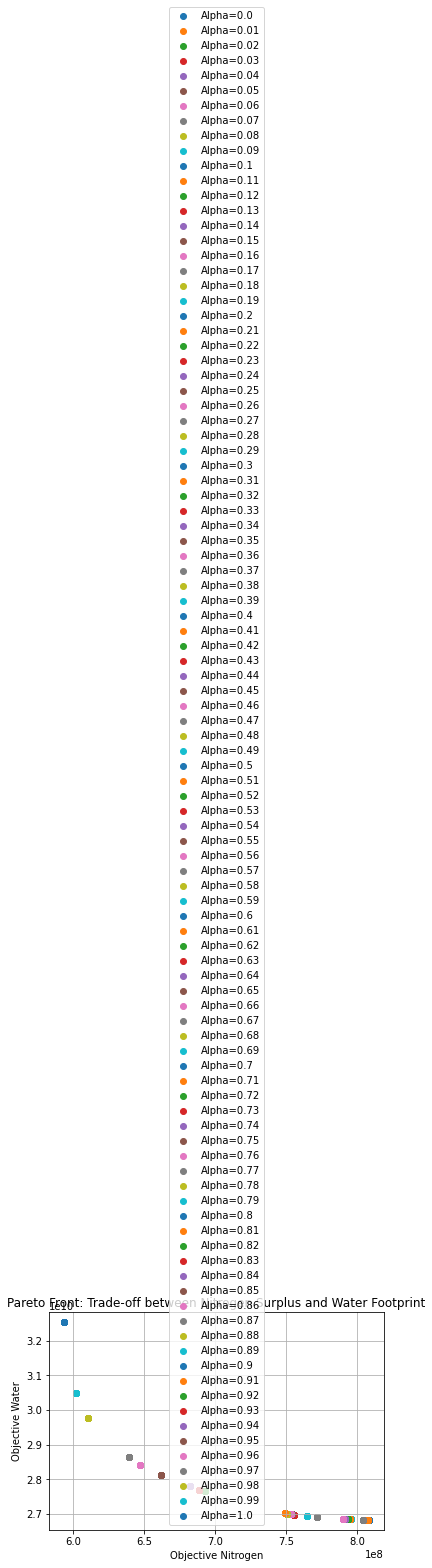

In [37]:
# Plotting
for alpha in alpha_values:
    filtered_results = df_results[df_results['Alpha'] == alpha]
    plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], label=f'Alpha={alpha}')

plt.xlabel('Objective Nitrogen')
plt.ylabel('Objective Water')
plt.title('Pareto Front: Trade-off between Nitrogen Surplus and Water Footprint')
plt.legend()
plt.grid(True)
plt.show()

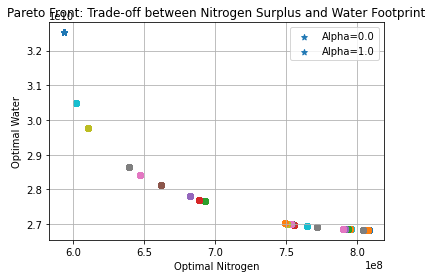

In [42]:
# Plotting
for alpha in alpha_values:
    filtered_results = df_results[df_results['Alpha'] == alpha]
    if alpha in [0, 1]:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], label=f'Alpha={alpha}', marker='*')
    else:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], marker='o')

plt.xlabel('Optimal Nitrogen')
plt.ylabel('Optimal Water')
plt.title('Pareto Front: Trade-off between Nitrogen Surplus and Water Footprint')
plt.legend()
plt.grid(True)
plt.show()


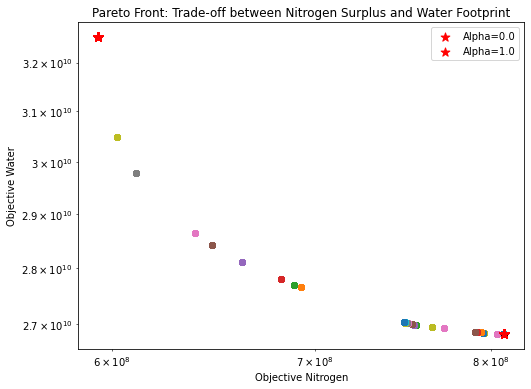

In [49]:
# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
for alpha in alpha_values:
    filtered_results = df_results[df_results['Alpha'] == alpha]
    if alpha in [0, 1]:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], label=f'Alpha={alpha}', marker='*', zorder=2, color='Red', s=85)
    else:
        plt.scatter(filtered_results['Objective Nitrogen'], filtered_results['Objective Water'], marker='o', alpha=0.5, zorder=1)

plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xlabel('Objective Nitrogen')
plt.ylabel('Objective Water')
plt.title('Pareto Front: Trade-off between Nitrogen Surplus and Water Footprint')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
# Find alpha values where both optimal water and nitrogen are minimum
# Calculate combined metric (e.g., sum of water and nitrogen)
df_results['Combined'] = df_results['Objective Water'] + df_results['Objective Nitrogen']

# Find alpha values where combined metric is minimum
min_combined = df_results['Combined'].min()

min_alpha_values = df_results[df_results['Combined'] == min_combined]['Alpha'].values


In [61]:
print("Alpha values where the combination of optimal water and nitrogen is minimum:")
for alpha_value in min_alpha_values:
    print(alpha_value)


Alpha values where the combination of optimal water and nitrogen is minimum:
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.42
0.4